# 1-5 산점도(scatter plot)
* 서로 다른 두 변수 사이의 관계
* 이때 각 변수는 연속되는 값을 갖는다.
* 일반적으로 정수형(int64) 또는 실수형(float64)값
* 2개의 연속 변수를 각각 x축 y축에 하나씩 놓고, 데이터 값이 위치하는 (x, y) 좌표를 찾아 점으로 표시
* plot() 메소드에 'o' 옵션을 사용하면 선 없이 점으로 표현 -> 산점도
* plot() 메소드에 kind = 'scatter' 옵션
    * x 옵션 : x축에 위치할 변수(데이터프레임의 열) 선택
    * y  옵션 : y축에 위치할 변수(데이터프레임의 열) 선택

In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 스타일 서식 지정
plt.style.use('default')

In [4]:
# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


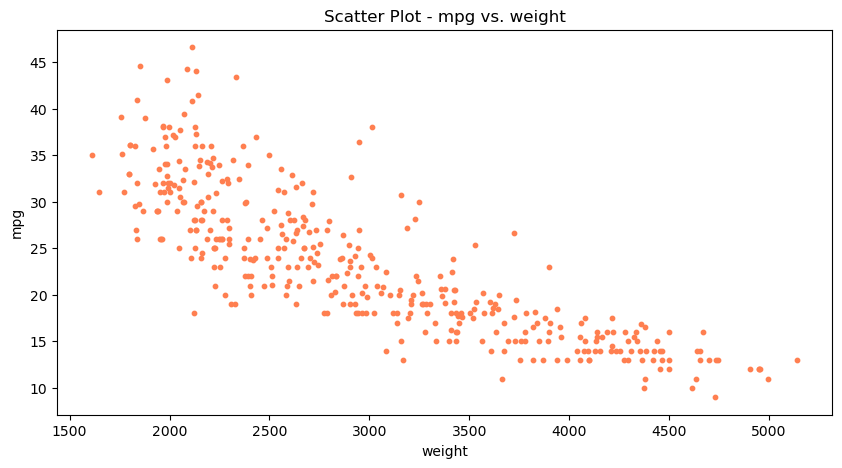

In [7]:
# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot - mpg vs. weight')
plt.show()

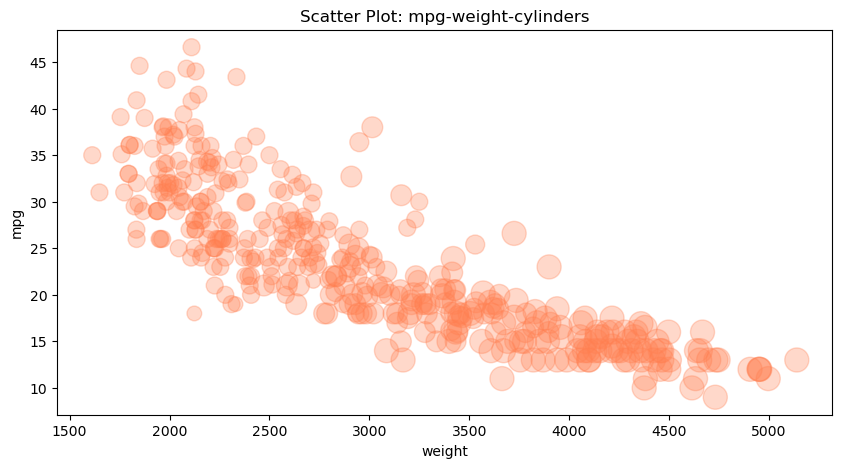

In [9]:
# 새로운 변수를 추가해 점의 크기 또는 색상으로 표현 가능
# 3번째 변수로 실린더 개수('cylinders') 열 추가

# 실린더 개수를 나타내는 정수를 그대로 쓰는 대신,
# 해당 열의 최대값 대비 상대적 크기를 나타내는 비율을 계산하여 cylinders_size 변수에 저장
# cylinders_size 데이터 : 0~1 범위의 실수 값의 배열(시리즈)

# 점의 크기를 정하는 s 옵션에 cylinders_size 입력 -> 값의 크기에 따라 점의 크기에 변화 -> 버블 차트

# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10, 5),
        s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

### 그래프를 그림 파일로 저장
* savefig() 저장하려는 파일의 이름과 경로설정

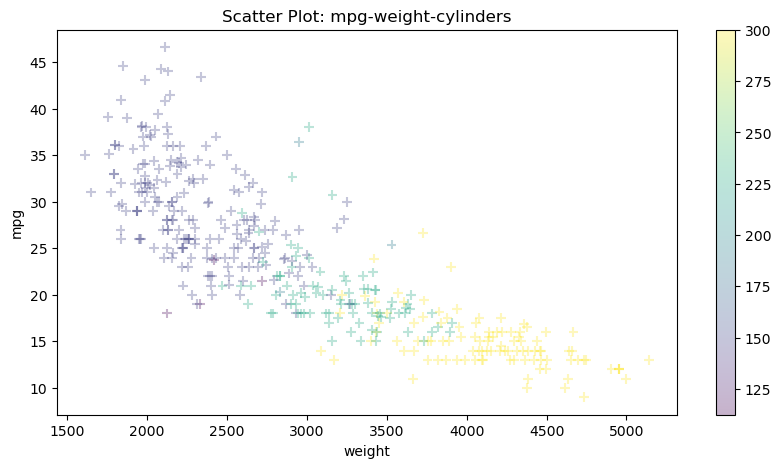

In [10]:
# marker = '+' 옵션
# c 옵션 : cylinders_size 할당 -> 값에 따라 다른 색상으로 표현
# 색상을 정하는 컬러맵(cmap)으로 'viridis' 옵션 사용

df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5),
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig("./scatter.png")   
plt.savefig("./scatter_transparent.png", transparent=True)   

plt.show()